# Dependencies

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import joblib

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Load and Explore

In [2]:
df = pd.read_csv('data/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.drop(columns=['id'], inplace=True)

In [4]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
round(df['diagnosis'].value_counts(normalize=True)*100)

diagnosis
B    63.0
M    37.0
Name: proportion, dtype: float64

# EDA

### Check Class Balance

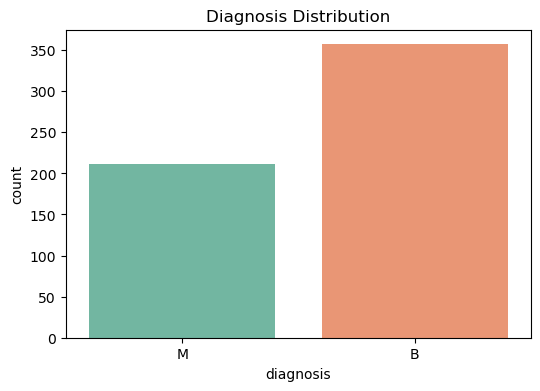

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x="diagnosis", data=df, palette="Set2")
plt.title("Diagnosis Distribution")
plt.show()

### Numerical Feature Analysis

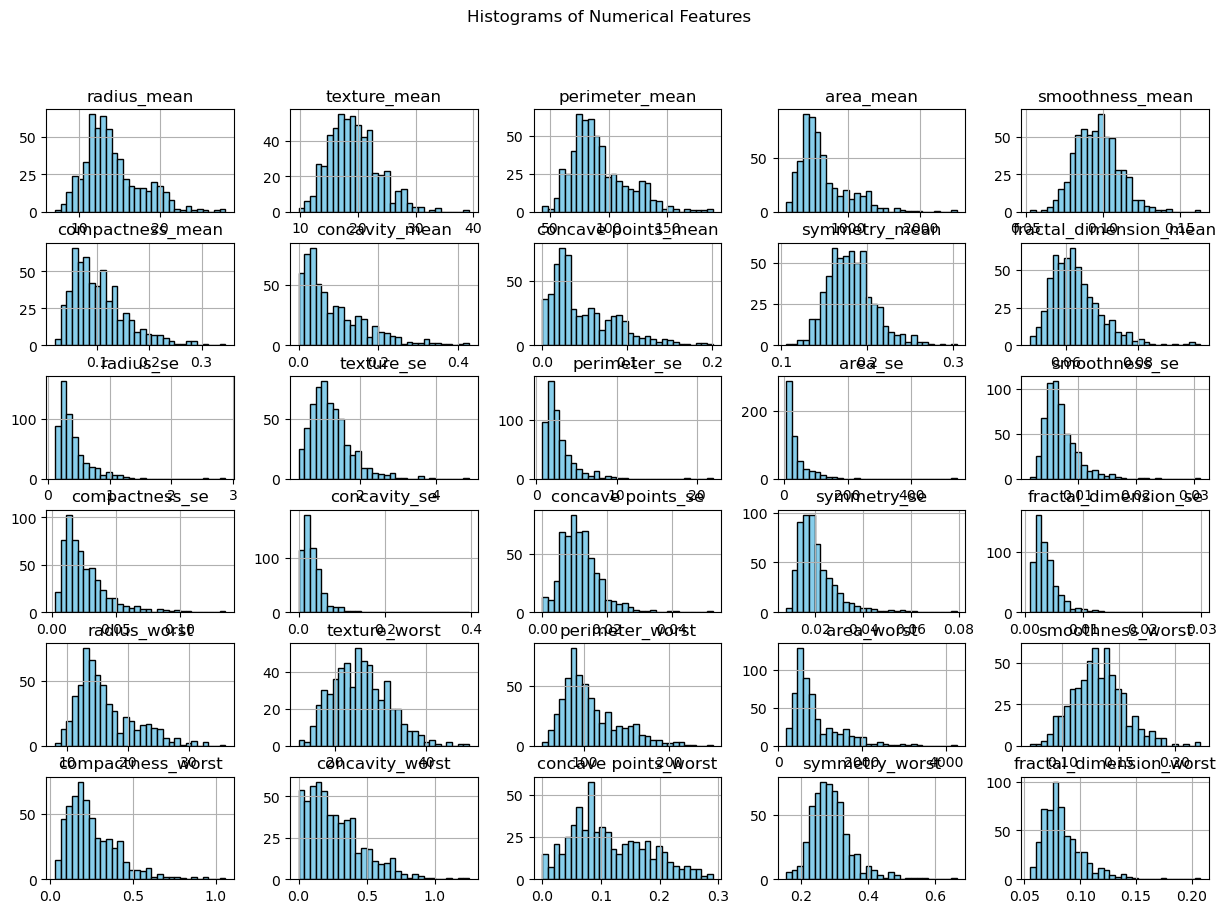

In [9]:
numerical_cols = [i for i in df.columns if df[i].dtype != 'object']

df[numerical_cols].hist(bins=30, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

### Correlation Analysis

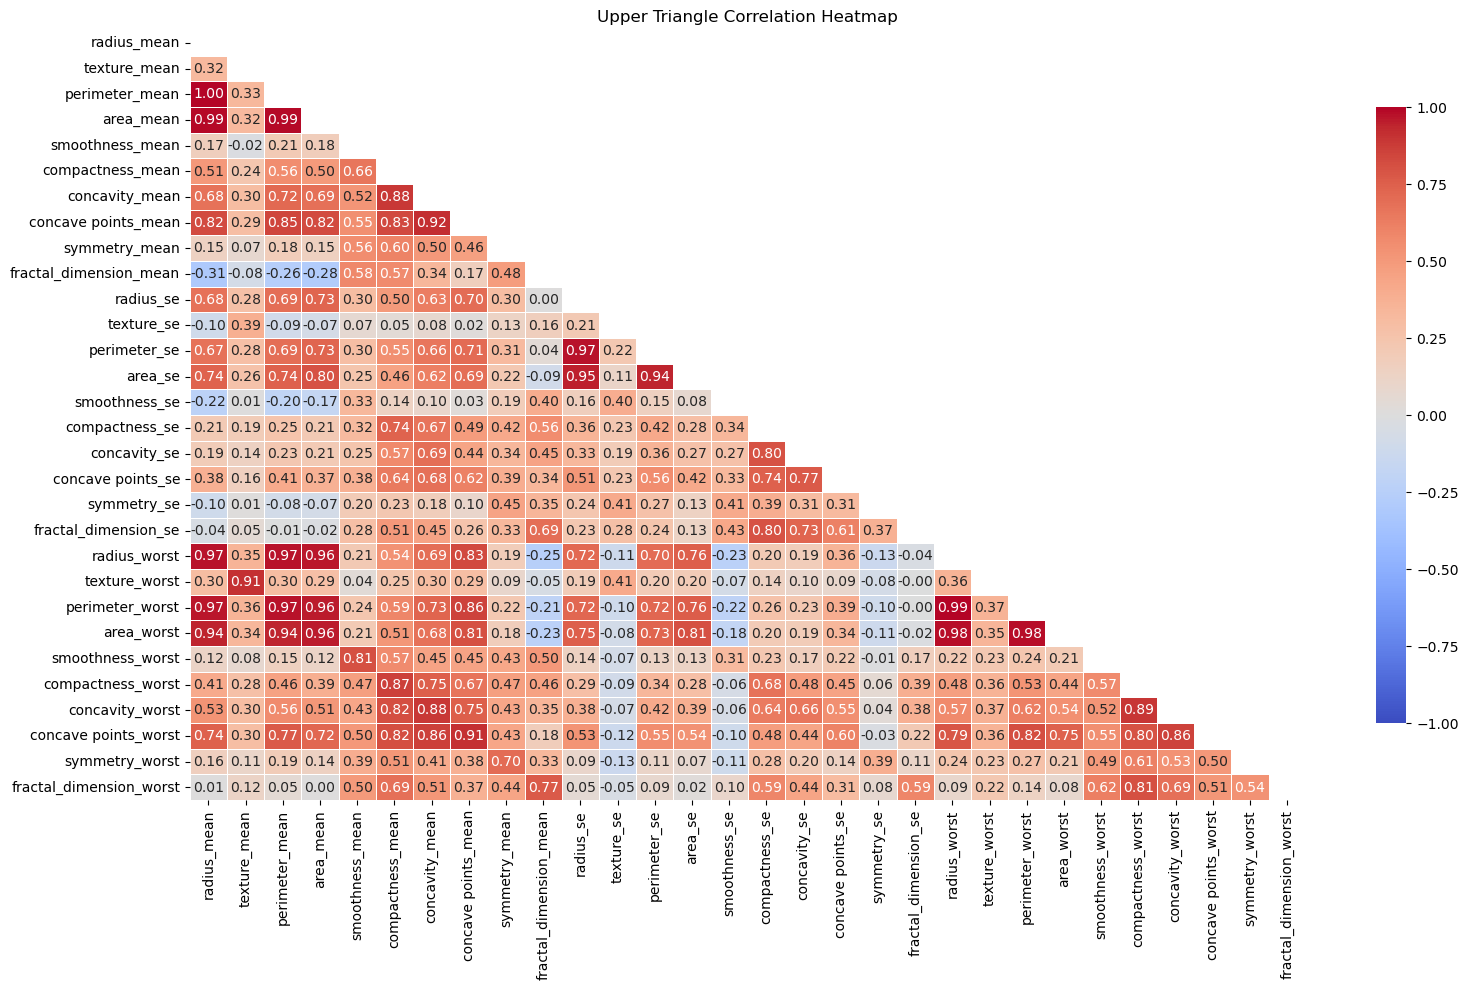

In [10]:
corr = df[numerical_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(18, 10))

sns.heatmap(
    corr, 
    mask=mask, 
    annot=True,
    fmt=".2f",
    cmap="coolwarm", 
    cbar_kws={"shrink": .8}, 
    vmax=1, 
    vmin=-1,
    linewidths=0.5
)

plt.title("Upper Triangle Correlation Heatmap")
plt.show()

### Outlier Detection

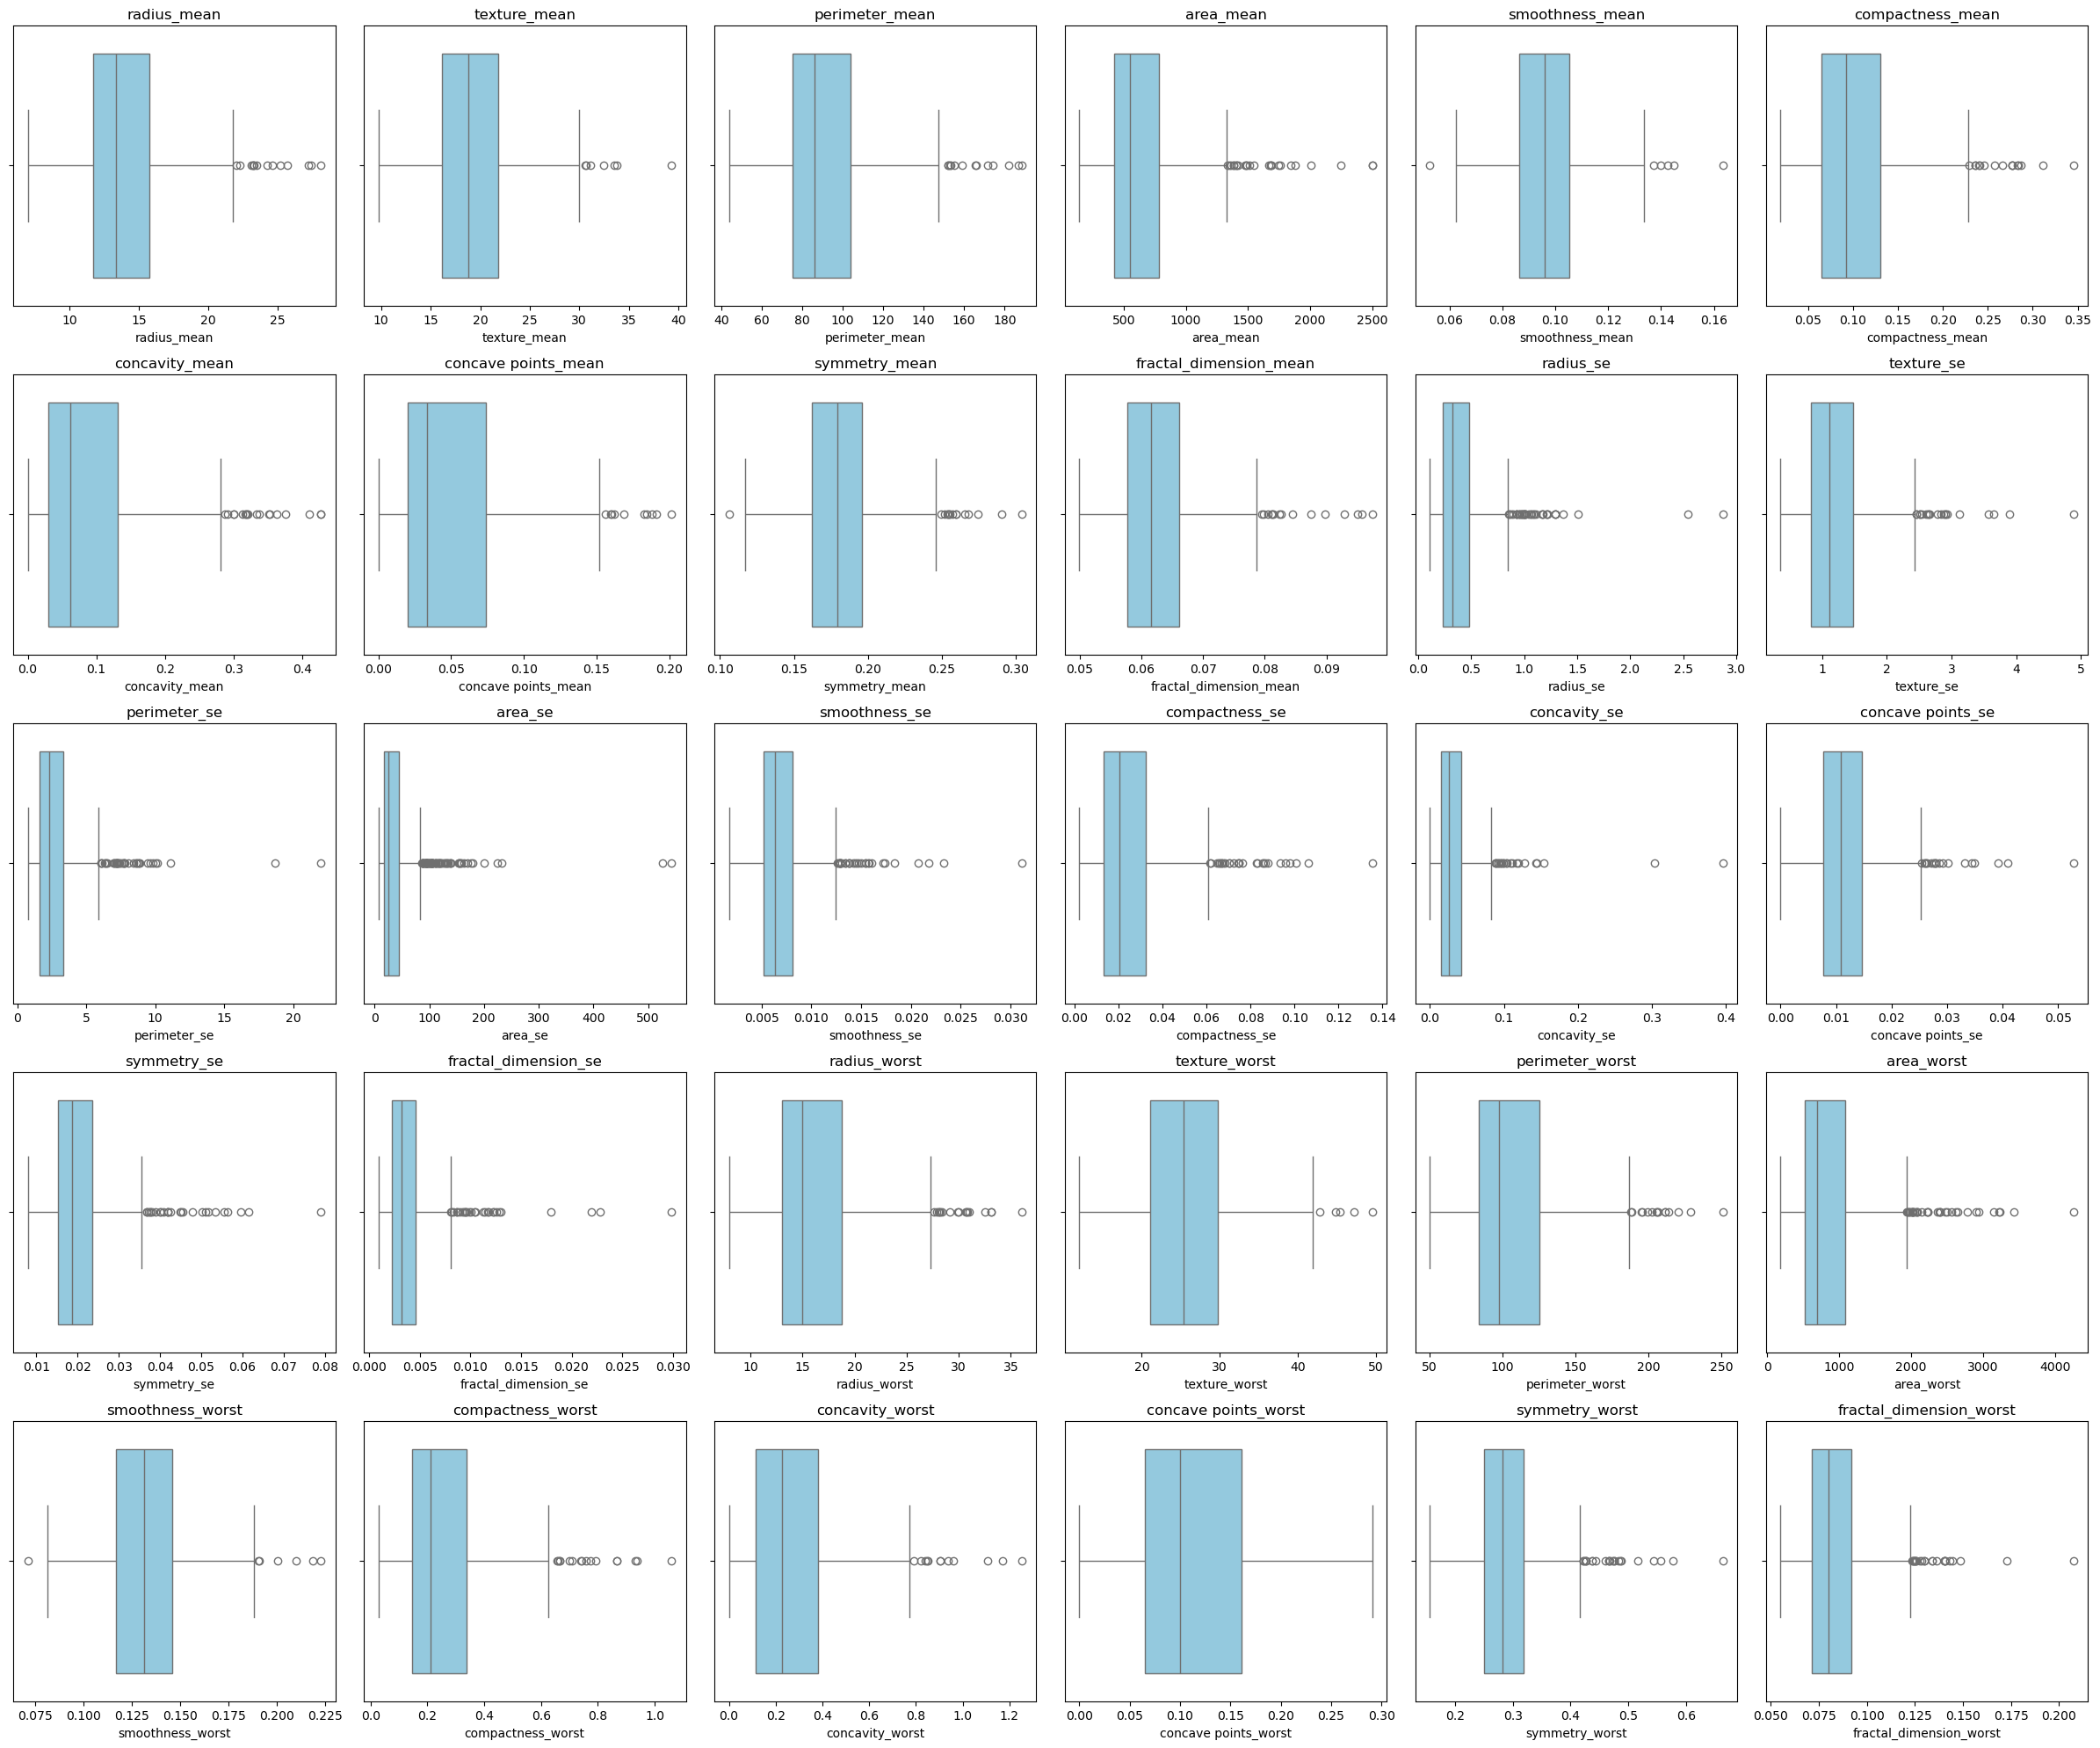

In [11]:
n_cols = 6
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # ceiling division

plt.figure(figsize=(n_cols*4, n_rows*4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col)
    plt.tight_layout()

plt.show()

### Handling Skewness & Outliers

In [12]:
outlier_dict = {}

df_cap = df.copy()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_dict[col] = outliers.tolist()
    
    df_cap[col] = np.where(df_cap[col] < lower_bound, lower_bound,
                  np.where(df_cap[col] > upper_bound, upper_bound, df_cap[col]))

outlier_counts = pd.DataFrame({
    "Feature": list(outlier_dict.keys()),
    "Outlier_Count": [len(v) for v in outlier_dict.values()]
}).sort_values(by="Outlier_Count", ascending=False)

outlier_counts

,Feature,Outlier_Count
13,area_se,65
10,radius_se,38
12,perimeter_se,38
23,area_worst,35
14,smoothness_se,30
19,fractal_dimension_se,28
15,compactness_se,28
18,symmetry_se,27
3,area_mean,25
29,fractal_dimension_worst,24


In [13]:
df_cap.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.84865,0.9053,5.9835,86.20,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,M,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.54350,0.7339,3.3980,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,M,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.74560,0.7869,4.5850,86.20,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,M,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,0.49560,1.1560,3.4450,27.23,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,M,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.75720,0.7813,5.4380,86.20,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [14]:
numeric_cols = df_cap[numerical_cols]

skew_values = numeric_cols.apply(lambda x: skew(x.dropna()))

skew_df = skew_values.to_frame(name='skewness').sort_values(by='skewness', key=abs, ascending=False)

skew_df

,skewness
area_se,1.127956
area_worst,1.046203
perimeter_se,1.031660
radius_se,1.022327
concavity_mean,1.021158
concave points_mean,1.001400
compactness_se,0.987673
fractal_dimension_se,0.976761
area_mean,0.920449
concavity_se,0.914322


In [15]:
skew_cols = [i for i in skew_df.index if abs(skew_df.loc[i, 'skewness']) > 0.6]

skewed_feats = df_cap[skew_cols]

for col in skewed_feats:
    if (df_cap[col] <= 0).any():
        df_cap[col] = np.log1p(df_cap[col])
    else:
        df_cap[col] = np.log(df_cap[col])

print("Log transformation applied on these features:")
print(skew_cols)
print()
df_cap[skew_cols] = skewed_feats
df_cap.head()

Log transformation applied on these features:
['area_se', 'area_worst', 'perimeter_se', 'radius_se', 'concavity_mean', 'concave points_mean', 'compactness_se', 'fractal_dimension_se', 'area_mean', 'concavity_se', 'compactness_worst', 'perimeter_worst', 'symmetry_se', 'radius_worst', 'fractal_dimension_worst', 'compactness_mean', 'concavity_worst', 'smoothness_se', 'texture_se', 'perimeter_mean', 'fractal_dimension_mean', 'radius_mean']



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.84865,0.9053,5.9835,86.20,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,M,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.54350,0.7339,3.3980,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,M,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.74560,0.7869,4.5850,86.20,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,M,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,0.49560,1.1560,3.4450,27.23,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,M,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.75720,0.7813,5.4380,86.20,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [16]:
corr_matrix = df_cap[numerical_cols].corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr = [
    (col, row, corr_matrix.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if pd.notna(upper.loc[row, col]) and upper.loc[row, col] > 0.9
]

high_corr_df = pd.DataFrame(high_corr, columns=["Feature1", "Feature2", "Correlation"])

high_corr_df.sort_values(by="Correlation", ascending=False, inplace=True)
high_corr_df

,Feature1,Feature2,Correlation
0,perimeter_mean,radius_mean,0.997692
1,area_mean,radius_mean,0.993891
14,perimeter_worst,radius_worst,0.993663
18,area_worst,radius_worst,0.993198
2,area_mean,perimeter_mean,0.991861
19,area_worst,perimeter_worst,0.986301
8,radius_worst,perimeter_mean,0.974555
12,perimeter_worst,perimeter_mean,0.973889
9,radius_worst,area_mean,0.973784
7,radius_worst,radius_mean,0.973472


### Manual Feature Selection

In [17]:
drop_cols = [
    'perimeter_mean', 'area_mean',
    'perimeter_worst', 'area_worst',
    'perimeter_se', 'area_se',
    'concave points_mean',
    'texture_worst',
    'concavity_worst'
]
df_manual = df_cap.drop(columns=drop_cols)

### Model Training

In [18]:
X = df_manual.drop(columns=['diagnosis'])
y = df_manual['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Kernel RBF

In [19]:
base_rbf = SVC(class_weight='balanced',kernel='rbf')
base_rbf.fit(X_train, y_train)

scores_manual = cross_val_score(base_rbf, X_train, y_train, cv=5, scoring='accuracy')
print("Manual selection accuracy:", np.mean(scores_manual))

Manual selection accuracy: 0.9736263736263737


### Kernel Linear

In [20]:
base_linear = SVC(class_weight='balanced',kernel='linear')
base_linear.fit(X_train, y_train)

scores_manual = cross_val_score(base_linear, X_train, y_train, cv=5, scoring='accuracy')
print("Manual selection accuracy:", np.mean(scores_manual))

Manual selection accuracy: 0.956043956043956


### Hyperparameter Tuning

In [21]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}

svc = SVC(class_weight='balanced')

grid = GridSearchCV(svc, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV F1-score:", grid.best_score_)

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV F1-score: 0.9716779120796106


### Model Evaluation

In [22]:
best_model = grid.best_estimator_

cv_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("CV Accuracy:", np.mean(cv_score), "+/-", np.std(cv_score))

CV Accuracy: 0.9736263736263737 +/- 0.013186813186813192


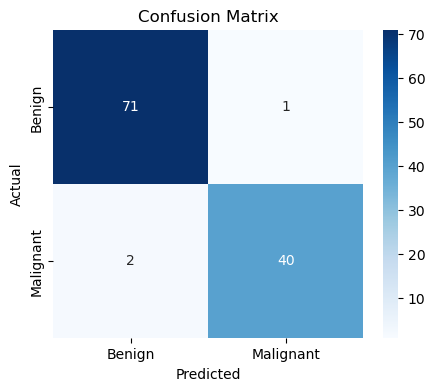

In [23]:
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [24]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Saving the Models

In [25]:
os.makedirs('models', exist_ok=True)

joblib.dump(best_model, 'models/svc_best_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(le, 'models/label_encoder.pkl')
joblib.dump(df_manual.columns, 'models/feature_columns.pkl')

['models/feature_columns.pkl']

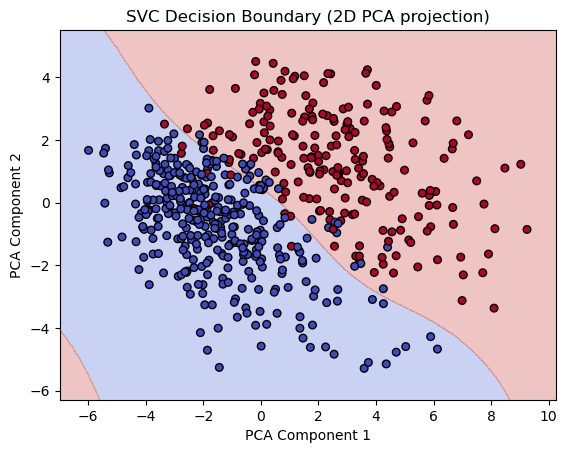

In [26]:
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
y_labels = df['diagnosis'].map({'B': 0, 'M': 1}).values

best_model.fit(X_pca, y_labels)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_labels, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVC Decision Boundary (2D PCA projection)")
plt.show()